# Assignment 4: Flanker Individual Analysis
## Computational Methods in Psychology and Neuroscience
### Psychology 4215/7215 --- Fall 2023

# Objectives

Upon completion of this assignment, the student will have:

A. Participated in the Flanker task.

B. Performed a regression analysis to test for the Simon effect in your data.


# Assignment

* Write code in a Jupyter notebook (after making a copy and renaming it to have your userid in the title --- e.g., A05_Flanker_Individual_Analysis_mst3k).

## Details

The goal of this assignment is to perform the Flanker task, upload the data to Canvas, and perform a regression analysis of your data. *Note, the data and analysis will be uploaded as two separate assignments (4a and 4b) on Canvas.*

To run the Flanker task:

- Download the flanker.zip file
- Unzip it (usually with a command like, `unzip flanker.zip`
- Change to the `flanker` directory, `cd flanker`
- Activate the smile virtual environment: `conda activate smile`
- Then run the experiment with: `python flanker_exp.py -s mst3k`, replacing `mst3k` with your userid.
- Follow the instructions and try to perform well on all the blocks (it should take around 5 minutes.)

Once you have run in the flanker experiment, put a copy of this notebook in the flanker directory. Then open the notebook and perform the regression analysis described below.

The Flanker experiment will also create a zip file for you of your data from the session you ran. It will have a name with the following format `flanker_subj_session.zip`, where subj will be the userid you entered above, and session will be the date/time when you started the experiment. You will upload these data to one of the matching assignment.
  
* ***When you are done with the analysis, save this notebook as HTML (`File -> Download as -> HTML`) and upload it to the matching assignment on Canvas. There will be a separate assignment for uploading the Flanker data from when you ran the task.***  

In [1]:
# Load some required modules
# If you get an import error, make sure the libraries are installed:
# conda install -c conda-forge statsmodels

import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.formula.api as smf
from statsmodels.stats.api import anova_lm

import matplotlib.pyplot as plt
import seaborn as sns

from smile.log import log2dl

In [2]:
# find and set the path to your log file (replace subj and sess with your info)
data_path = "./flanker_csh4hf_20231010_165329/data/Flanker/csh4hf/20231010_165329/"
log_file = data_path+"log_flanker_0.slog"

# load it in
dl = log2dl(log_file)

# convert it to a Pandas DataFrame
df = pd.DataFrame(dl)

# show the first few lines
df.head()

,resp_map_left,resp_map_right,block_num,trial_num,stim_on_time,stim_on_error,resp,resp_time_time,resp_time_error,rt,correct,location_0,location_1,log_time,condition,direction,stimulus,log_num
0,F,J,0,0,1.839788e+06,0.0,J,1.839790e+06,0.000194,2.041205,True,1484.273709,599.895137,1.839790e+06,mix,right,><<><<>,0
1,F,J,0,1,1.839790e+06,0.0,J,1.839791e+06,0.000226,0.785696,True,894.264562,702.798451,1.839792e+06,congruent,right,>>>>>>>,0
2,F,J,0,2,1.839792e+06,0.0,F,1.839793e+06,0.000195,0.822177,True,1082.686958,534.015989,1.839794e+06,incongruent,left,>>><>>>,0
3,F,J,0,3,1.839794e+06,0.0,J,1.839794e+06,0.000178,0.706270,True,1667.327907,866.019666,1.839795e+06,congruent,right,>>>>>>>,0
4,F,J,0,4,1.839795e+06,0.0,J,1.839796e+06,0.000164,1.056794,True,1014.091336,831.300063,1.839797e+06,mix,right,><<><<>,0


In [3]:
# load in the sysinfo slog
sinfo = log2dl(data_path+'sysinfo.slog')[0]
sinfo

{'fullscreen': None,
 'locked': 0,
 'density': '1.0',
 'font_size': 45.0,
 'font_name': 'Roboto',
 'frame_rate': 60.0,
 'default_data_dir': './data',
 'data_time': '20231010_165329',
 'debug': False,
 'resolution': None,
 'background_color': None,
 'scale_box_0': 1024,
 'scale_box_1': 768,
 'scale_up': True,
 'scale_down': True,
 'expname': 'Flanker',
 'processor': '',
 'python_version': '3.11.5',
 'system': 'Linux',
 'version': '',
 'author': '',
 'email': '',
 'date_last_update': '',
 'screen_size_0': 2560,
 'screen_size_1': 1440,
 'scale_factor': 1.875,
 'log_num': 0}

In [4]:
# perform some quick data cleanup
# calculate the offset from the center
df["x_offset"] = df["location_0"] - sinfo["screen_size_0"] / 2

df["dx"] = np.concatenate([[np.nan], np.diff(df["location_0"], n=1)])

# save the log(rt)
df["log_rt"] = np.log(df["rt"])

# print out all the column names
print(df.columns)

Index(['resp_map_left', 'resp_map_right', 'block_num', 'trial_num',
       'stim_on_time', 'stim_on_error', 'resp', 'resp_time_time',
       'resp_time_error', 'rt', 'correct', 'location_0', 'location_1',
       'log_time', 'condition', 'direction', 'stimulus', 'log_num', 'x_offset',
       'dx', 'log_rt'],
      dtype='object')


<Axes: >

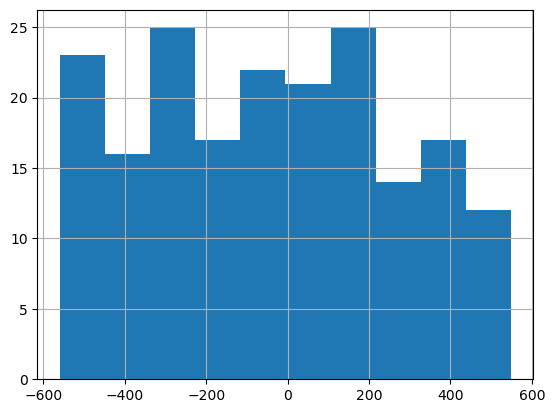

In [5]:
# plot the distribution of x_offset values (to see if it's skewed)
df['x_offset'].hist()

# BONUS: Use a non-parametric test to see whether they are skewed with respect to 0
# HINT: It's the sign rank test we talked about in class that was invented by Wilcoxon

/home/csh4hf/anaconda3/envs/smile/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


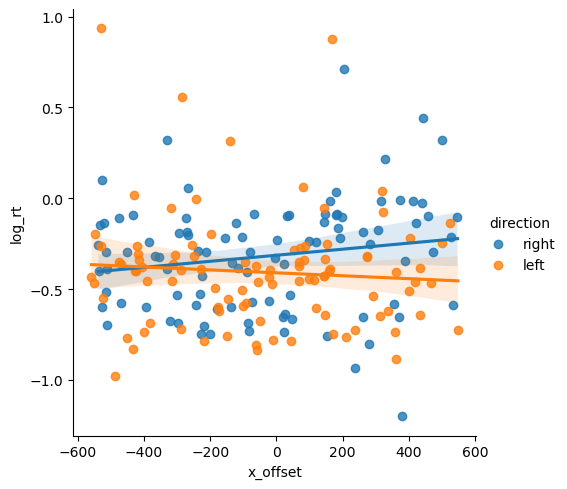

In [6]:
sns.lmplot(y='log_rt', x='x_offset', hue='direction', data=df)

In [7]:
# perform the regression

# YOUR CODE HERE TO DEFINE AND FIT THE MODEL
# you want to test if the log_rt is dependent on x_offset and direction (and their interaction)
model = smf.ols("log_rt ~ x_offset*direction", df).fit()
# print the model summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 log_rt   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.324
Date:                Thu, 12 Oct 2023   Prob (F-statistic):             0.0763
Time:                        17:19:46   Log-Likelihood:                -47.356
No. Observations:                 192   AIC:                             102.7
Df Residuals:                     188   BIC:                             115.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -0.4104      0.032    -12.690      0.000      -0.474      -0.347
direction[T.right]              0.0968      0.046      2.122      0.035       0.007       0.187
x_offset                    -8.052e-05      0.000     -0.766      0.445      -0.000       0.000
x_offset:direction[T.right]     0.0002      0.000      1.691      0.093   -4.12e-05       0.001
==============================================================================
Omnibus:                       40.114   Durbin-Watson:                   1.644
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              100.472
Skew:                           0.897   Prob(JB):                     1.52e-22
Kurtosis:                       6.056   Cond. No.                         831.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
# perform an ANOVA on the model to show whether the main effects and interaction are significant
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
direction,1.0,0.361965,0.361965,3.696254,0.056046
x_offset,1.0,0.040883,0.040883,0.417488,0.518981
x_offset:direction,1.0,0.279950,0.279950,2.858753,0.092535
Residual,188.0,18.410356,0.097927,NaN,NaN


## Did you show a Simon effect? 

Look at the `PR(>F)` column for the `direction:x_offset` interaction row.

I showed a trending Simon effect but it wasn't at the 0.05 significance level (p=0.093). 